## Definición del problema
El conjunto de datos de la flor Iris contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder las siguientes preguntas:

* P1.— ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?

* P2.— ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

* P3.— ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

In [1]:
##
## Preparación
##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
##
## Lectura del archivo.
##
df = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/iris.csv",
                 sep = ',',         # separador de campos
                 thousands = None,  # separador de miles para números
                 decimal = '.')     # separador de los decimales para números
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


En el análisis exploratorio de datos se busca obtener información de interés de la población a partir de una muestra que es representativa de la población. En términos más formales, se usa para generar hipótesis sobre los datos, tales como:

Ubicación del centro de los datos.

Dispersión de los datos.

Distribución de probabilidades de los datos.

Relaciones entre los datos.

Uno de los objetivos fundamentales en estadística es estimar el valor de un parámetro de la población mediante un estadístico calculado sobre la muestra.

Existen dos aproximaciones para estimar características de la población:

Estimación de intervalos de confianza: usualmente para estadísticos calculados sobre la muestra de datos.

Pruebas de hipótesis: para propiedades más complejas de la población, como por ejemplo su distribución de probabilidades o relaciones de dependencia entre variables.

Población: Colección de objetos o individuos sobre los cuales se desea obtener información de interés.

Parámetro: Un número que resume una propiedad o característica de la población entera.

Muestra: Grupo obtenido aleatoriamente que es representativo de la población.

Estadístico: Un número que resume una propiedad o característica de la muestra.

Tipos de datos:

Continuos (flotante, numérico)

Discretos (enteros)

Categóricos (enumeraciones, fctores, valores nominales).

Binarios (Indicadores, lógicos)

Ordinales (Categóricos con un ordenamiento explícito, factores ordenados).

Datos rectagulares: Datos organizados en una tabla.

Feature: característica, atributo, entrada, predictor, variable independiente.

Outcome: resultado, variable dependiente, respuesta, objetivo, salida.

Registro: fila en una tabla de datos, también conocida como caso, ejemplo, instancia, observación, patrón o muestra.

Respuesta a las preguntas
P1.— ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?
En esta pregunta se esta pidiendo una medida o estimación de localización del valor típico de la longitud del pétalo. Existen varias medidas.

Media o promedio muestral: valor “típico” de los datos.

In [3]:
df.mean()

Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

In [4]:
df.groupby("Species").mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Media ponderada:

x¯=1∑ni=1wi∑i=1nwixi
Outlier o valor atípico: valores extremadamente distantes del resto de los datos. En algunos casos se pueden definir en términos de la media y la desviación estándar de la muestra; por ejemplo, se considera outliers aquellas observaciones distantes más de 3.5σ de la media.

Media truncada: se calcula la media sobre los datos después de eliminar los p datos más pequeños y los p datos más grandes. Si x(1), x2, …, x(n) representan los datos ordenados, donde x(1) es el dato más pequeño y x(n) el más grande, entonces la media truncada se calcula como:

1n−2p∑i=1+pn−pxi
Mediana: es el valor x((n+1)/2) cuando se ordenan los datos. Es una aproximación robusta (no influenciada por datos atípicos o distribuciones asimétricas.

In [8]:
df.median()
df.quantile(0.5)

Sepal_Length    5.80
Sepal_Width     3.00
Petal_Length    4.35
Petal_Width     1.30
Name: 0.5, dtype: float64

## P2.— ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

Esta pregunta hace referencia a una medida de dispersión o variabilidad de los datos, y a como se distribuyen los datos

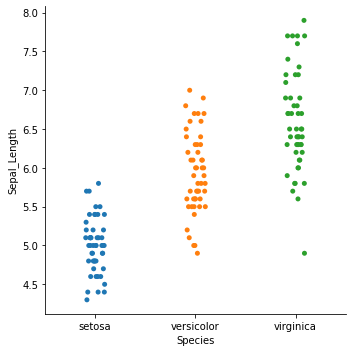

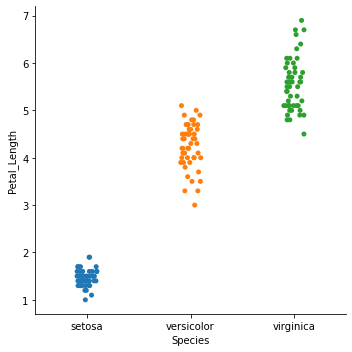

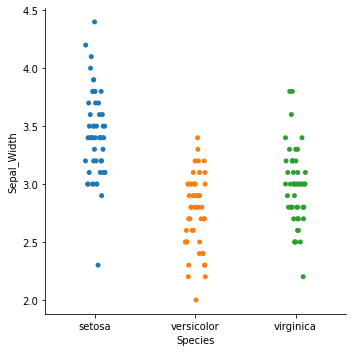

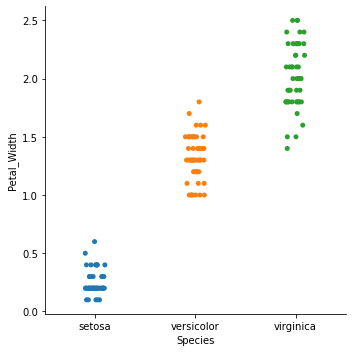

In [10]:
sns.catplot(x="Species", y="Sepal_Length", data=df)
sns.catplot(x="Species", y="Petal_Length", data=df)
sns.catplot(x="Species", y="Sepal_Width",  data=df)
sns.catplot(x="Species", y="Petal_Width",  data=df);

## Medidas de dispersión y variabilidad


* Desviación: diferencia entre el valor observado y el valor estimado de localización. En modelado sus sinónimos son errores o residuales.
* Rango: diferencia entre el valor más grande y más pequeño de la muestra de los datos.

In [11]:
df.max()

Sepal_Length          7.9
Sepal_Width           4.4
Petal_Length          6.9
Petal_Width           2.5
Species         virginica
dtype: object

In [12]:
df.min()

Sepal_Length       4.3
Sepal_Width          2
Petal_Length         1
Petal_Width        0.1
Species         setosa
dtype: object

In [13]:
df.groupby("Species").max()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [14]:
df.groupby("Species").min()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [15]:
##
## Computa elrango

df._get_numeric_data().max() - df._get_numeric_data().min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

In [11]:
df.select_dtypes("number").max() - df.select_dtypes("number").min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

## Varianza muestral


s2=1n−1∑i=1n(xi−x¯)2

In [17]:
df.var()

Sepal_Length    0.685694
Sepal_Width     0.189979
Petal_Length    3.116278
Petal_Width     0.581006
dtype: float64

In [18]:
df.groupby("Species").var()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [19]:
df.std()

Sepal_Length    0.828066
Sepal_Width     0.435866
Petal_Length    1.765298
Petal_Width     0.762238
dtype: float64

In [13]:
df.groupby("Species").std()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


## Desviación media absoluta (MAD): norma L1 o distancia de Manhattan

In [21]:
df.mad()

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

In [22]:
df.groupby("Species").mad()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.27072,0.28736,0.13152,0.08256
versicolor,0.42144,0.25480,0.37920,0.15712
virginica,0.50256,0.24216,0.44000,0.22808


# Desviación absoluta de la mediana: 
ya que la varianza y la desviación media absoluta no son robusta a outliers, se puede realizar un estimado de la desviación usando la mediana m de la muestra:

Mediana(|x1−m|,|x2−m|,...,|xn−m|)
También es posible computar la varianza muestral truncada en analogía a la media truncada.

In [23]:
def madm(df):
    d = df._get_numeric_data().copy()
    m = d.median()
    for c in d.columns:
        d[c] = d[c] - m[c]
    return d.mad()
madm(df)

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

### Estadisticos 

**Estadísticos de orden**: Métricas calculadas sobre los datos ordenados.

**Percentil p:** Valor para el cual p por ciento de los datos son menores o iguales.

**Cuartil inferior**: Valor para el cual el 25% de las observaciones son más pequeñas (percentil del 25%).

**Cuartil superior**: Valor para el cual el 25% de las observaciones son más grandes (percentil del 75%).

**Rango intercuartil** (IQR) Cuartil superior - Cuartil inferior

In [14]:
df.quantile(0.25)

Sepal_Length    5.1
Sepal_Width     2.8
Petal_Length    1.6
Petal_Width     0.3
Name: 0.25, dtype: float64

In [15]:
df.groupby("Species").quantile(0.25)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [16]:
df.quantile(0.75)

Sepal_Length    6.4
Sepal_Width     3.3
Petal_Length    5.1
Petal_Width     1.8
Name: 0.75, dtype: float64

In [17]:
df.groupby("Species").quantile(0.75)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [18]:
df.quantile(0.75) - df.quantile(0.25)

Sepal_Length    1.3
Sepal_Width     0.5
Petal_Length    3.5
Petal_Width     1.5
dtype: float64

In [19]:
df.groupby("Species").quantile(0.75) - df.groupby("Species").quantile(0.25)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


#### Coeficiente de variación (CV):

CV = 100 * s/media(x)

In [20]:
100*df.std()/df.mean()

Sepal_Length    14.171126
Sepal_Width     14.256420
Petal_Length    46.974407
Petal_Width     63.555114
dtype: float64

In [23]:
100*df.groupby("Species").std()/df.groupby("Species").mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,7.041344,11.057887,11.878522,42.839670
versicolor,8.695606,11.328459,11.030774,14.913475
virginica,9.652089,10.843868,9.940466,13.556271


In [24]:
df.groupby("Species")["Sepal_Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [32]:
for x in df._get_numeric_data().columns:
    print(df.groupby("Species")[x].describe())
    print("")

            count   mean       std  min    25%  50%  75%  max
Species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

            count   mean       std  min    25%  50%    75%  max
Species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

            count   mean       std  min  25%   50%    75%  max
Species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

            count   mean       std  min  25%  50%  7

### Análisis de la distribución de los datos

#### Boxplot o diagrama de caja y bigotes

Gráfico que representa la distribución de los datos. En la siguiente figura se presentan dichos diagramas para los datos que aparecen en el archivo muestra.csv. La caja central representa el rango intercuartilico, la línea central de la caja corresponde a la mediana de los datos; los "bigotes" se extienden hasta el dato más lejano enc ada dirección, sin superar 1.5(u otro valor) veces el rango intercuartil. Los puntos represenan valores en los datos que son más lejanos de 1.5 veces el rango intercuartil y podrían ser considerados outliers

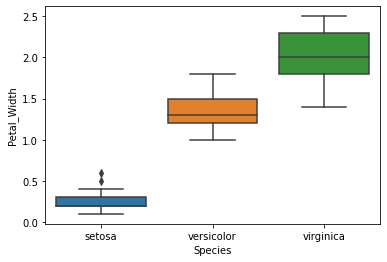

In [33]:
sns.boxplot(x = "Species", y = "Petal_Width", data = df)

**Diagrama de violin:** Diagrama similar a un boxplot pero muestra el estimado de la densidad de probabilidad

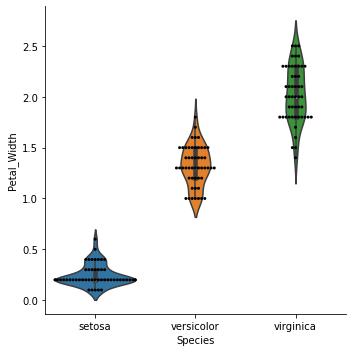

In [37]:
g = sns.catplot(x = "Species", y = "Petal_Width", kind = "violin",  data = df)
sns.swarmplot(x = "Species", y = "Petal_Width", color = "k", size = 3, data = df, ax = g.ax)

**Histograma**: Es un diagrama que representa la cantidad de datos que contiene cada segmento en que se divide el rango de la variable analizada.

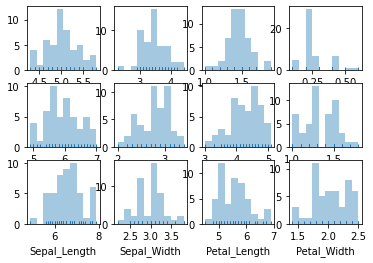

In [41]:
for i,(key, group) in enumerate(df.groupby("Species")):
    for j, col in enumerate(df._get_numeric_data().columns):
        plt.subplot(3, 4, 4*i+j+1)
        sns.distplot(group[col], kde = False, bins = 10, rug = True, hist_kws={'alpha': 0.4})

**Estimado no paramétrico de la función de densidad de probabilidad:** Es una aproximación a al fdp real de la población que se obtiene al ubicar un kernel en cada dato

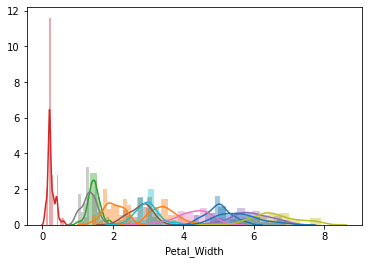

In [56]:
for key, group in df.groupby("Species"):
    for j, col in enumerate(df._get_numeric_data().columns):
        sns.distplot(group[col], bins = 10, hist_kws={"alpha": 0.4})

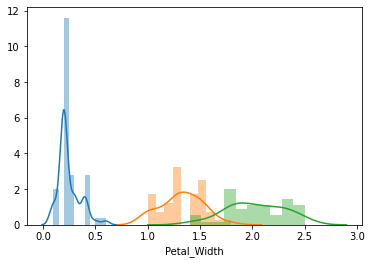

In [59]:
for key, group in df.groupby("Species"):
    sns.distplot(group["Petal_Width"], bins = 10, hist_kws= {"alpha": 0.4})

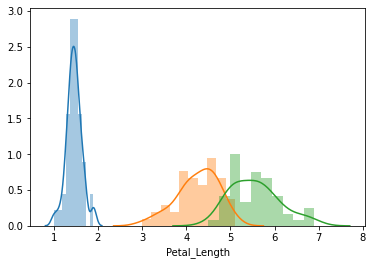

In [60]:
for key, group in df.groupby("Species"):
    sns.distplot(group["Petal_Length"], bins = 10, hist_kws= {"alpha": 0.4})

## ¿Qué relación existe entre el alrgo y el ancho del pétalo y el sépalo


### Relación entre dos o más variables

**Diagrama de dispersión**: Gráfico en que el eje X corresponde a una variable, mientras que el eje Y, corresponde a otro. Estos gráficos nos sirven para visualizar relaciones de dependencia.

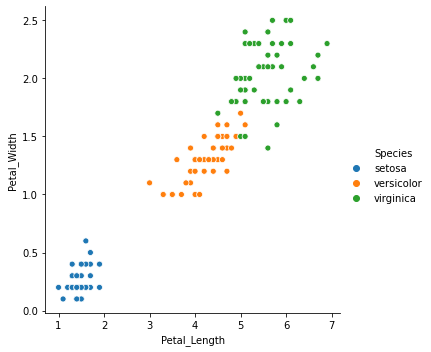

In [61]:
sns.relplot(x="Petal_Length", y = "Petal_Width", hue = "Species", data = df)

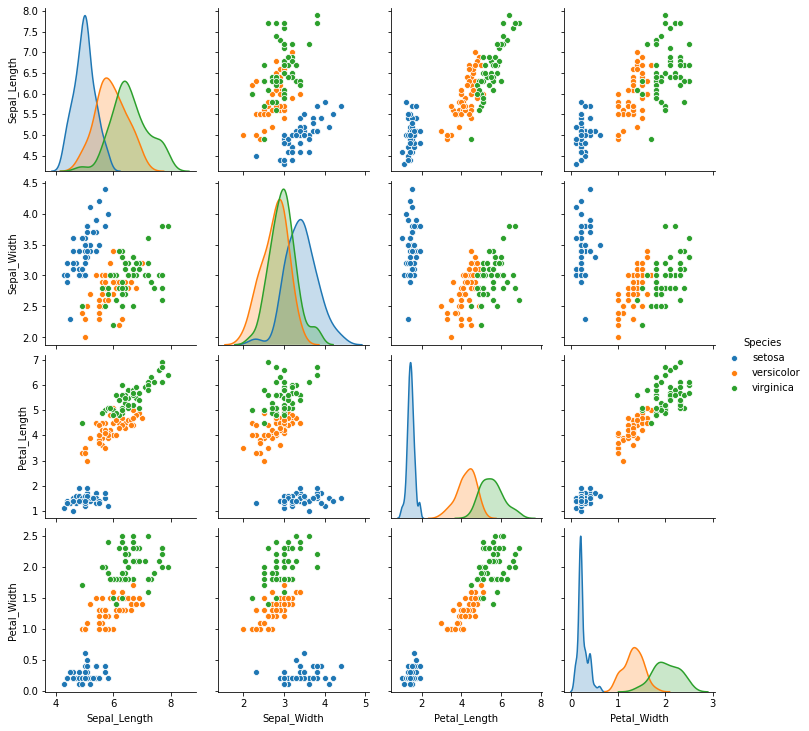

In [62]:
sns.pairplot(df, hue = "Species")

**Gráfico de hexágonos (hexagonal binning plot)**: Cuando los diagramas de dispersión contienen muchos datos se hacen demasiado densos impidiendo la visualización. En este caso, el espacio X-Y del gráfico es dividido en hexágonos que cuentan la cantidad de puntos que caen en ellos; en este gráfico, el color de cada hexágono representa la cantidad de puntos en él (un ejemplo es presentado https://mathematica.stackexchange.com/questions/28149/implementing-hexagon-binning-in-mathematica).

In [65]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


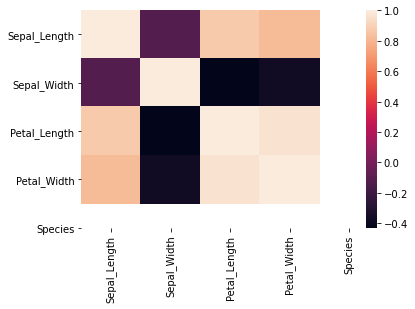

In [68]:
sns.heatmap(df.corr(),
           xticklabels=df.columns.values,
           yticklabels=df.columns.values)